<a href="https://colab.research.google.com/github/merine-j/machinelearning_projects/blob/main/Multiple_linear_regression_predanltycs_proj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.6 MB/s eta 0:00:00


In [3]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Data Loading & EDA**

In [7]:
df=pd.read_csv('/content/cars.csv')
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [8]:
df.drop(['Engine Information.Hybrid','Identification.Make','Identification.Model Year','Identification.Year'],axis=1,inplace=True)

In [9]:
df.rename(columns={
    "Dimensions.Height": "Car Height",
    "Dimensions.Length": "Car Length",
    "Dimensions.Width": "Car Width",
    "Engine Information.Driveline": "Driveline",
    "Engine Information.Engine Type": "Engine_Type",
    "Engine Information.Hybrid": "Hybrid",
    "Engine Information.Number of Forward Gears": "Number of Forward_Gears",
    "Engine Information.Transmission": "Transmission",
    "Fuel Information.City mpg": "City_mpg",
    "Fuel Information.Fuel Type": "Fuel_Type",
    "Fuel Information.Highway mpg": "Highway_mpg",
    "Identification.Classification": "Classification",
    "Identification.ID": "ID",
    "Engine Information.Engine Statistics.Horsepower": "Engine Horsepower",
    "Engine Information.Engine Statistics.Torque": "Engine Torque"
}, inplace=True)

print(df.columns)

Index(['Car Height', 'Car Length', 'Car Width', 'Driveline', 'Engine_Type',
       'Number of Forward_Gears', 'Transmission', 'City_mpg', 'Fuel_Type',
       'Highway_mpg', 'Classification', 'ID', 'Engine Horsepower',
       'Engine Torque'],
      dtype='object')


In [10]:
df.shape

(5076, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076 entries, 0 to 5075
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Height               5076 non-null   int64 
 1   Car Length               5076 non-null   int64 
 2   Car Width                5076 non-null   int64 
 3   Driveline                5076 non-null   object
 4   Engine_Type              5076 non-null   object
 5   Number of Forward_Gears  5076 non-null   int64 
 6   Transmission             5076 non-null   object
 7   City_mpg                 5076 non-null   int64 
 8   Fuel_Type                5076 non-null   object
 9   Highway_mpg              5076 non-null   int64 
 10  Classification           5076 non-null   object
 11  ID                       5076 non-null   object
 12  Engine Horsepower        5076 non-null   int64 
 13  Engine Torque            5076 non-null   int64 
dtypes: int64(8), object(6)
memory usage: 555

In [12]:
df.dtypes

,0
Car Height,int64
Car Length,int64
Car Width,int64
Driveline,object
Engine_Type,object
Number of Forward_Gears,int64
Transmission,object
City_mpg,int64
Fuel_Type,object
Highway_mpg,int64


In [13]:
df.isna().sum()

,0
Car Height,0
Car Length,0
Car Width,0
Driveline,0
Engine_Type,0
Number of Forward_Gears,0
Transmission,0
City_mpg,0
Fuel_Type,0
Highway_mpg,0


In [14]:
df.describe()

,Car Height,Car Length,Car Width,Number of Forward_Gears,City_mpg,Highway_mpg,Engine Horsepower,Engine Torque
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,5.519110,17.275808,24.125493,270.499409,272.707250
std,62.125026,77.358295,79.925899,0.845637,4.479485,6.488293,95.293537,100.123328
min,1.000000,2.000000,1.000000,4.000000,8.000000,11.000000,100.000000,98.000000
25%,104.000000,60.000000,62.000000,5.000000,14.000000,20.000000,190.000000,187.000000
50%,152.000000,128.000000,158.000000,6.000000,17.000000,24.000000,266.000000,260.000000
75%,193.000000,198.000000,219.000000,6.000000,20.000000,28.000000,317.000000,335.000000
max,255.000000,255.000000,254.000000,8.000000,38.000000,223.000000,638.000000,774.000000


In [15]:
df.describe(include='O')

,Driveline,Engine_Type,Transmission,Fuel_Type,Classification,ID
count,5076,5076,5076,5076,5076,5076
unique,4,535,11,4,2,5030
top,Rear-wheel drive,Chevrolet 6.2L 8 Cylinder 430 hp 424 ft-lbs,6 Speed Automatic Select Shift,Gasoline,Automatic transmission,2010 Mercedes-Benz R350 BlueTEC 4Matic
freq,1751,96,1313,4591,3949,3


In [17]:
df.duplicated().sum()


30

In [16]:
df[df.duplicated()]

,Car Height,Car Length,Car Width,Driveline,Engine_Type,Number of Forward_Gears,Transmission,City_mpg,Fuel_Type,Highway_mpg,Classification,ID,Engine Horsepower,Engine Torque
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,200,207
121,35,150,52,Rear-wheel drive,Nissan 3.7L 6 Cylinder 332 hp 270 ft-lbs,6,6 Speed Manual,18,Gasoline,26,Manual transmission,2011 Nissan 370Z Touring Coupe,332,270
354,38,95,189,Rear-wheel drive,Maybach 6.0L 12 Cylinder 631 hp 738 ft-lbs Turbo,5,5 Speed Automatic Select Shift,10,Gasoline,16,Automatic transmission,2010 Maybach 57 Zeppelin,631,738
371,13,14,229,Front-wheel drive,Toyota 1.8L 4 Cylinder 132 hp 128 ft-lbs.,4,4 Speed Automatic,25,Gasoline,31,Automatic transmission,2010 Toyota Matrix AT,132,128
1241,13,233,153,All-wheel drive,Hyundai 3.8L 6 cylinder 260hp 257 ft-lbs,6,6 Speed Automatic Select Shift,16,Gasoline,21,Automatic transmission,2011 Hyundai Veracruz Limited AWD,260,257
1261,193,251,49,Rear-wheel drive,Cadillac 3.0L 6 Cylinder 270 hp 223 ft-lbs,6,6 Speed Manual,16,Gasoline,26,Manual transmission,2011 Cadillac CTS Sport Sedan,270,223
1389,212,108,135,Rear-wheel drive,Chevrolet 6.2L 8 Cylinder 430 hp 424 ft-lbs,6,6 Speed Automatic,15,Gasoline,25,Automatic transmission,2010 Chevrolet Corvette Grand Sport Convertibl...,430,424
1656,200,245,54,All-wheel drive,BMW 3.0L 6 cylinder 300 hp 300 ft-lbs Turbo,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2010 BMW 535i xDrive Sedan AT,300,300
1658,200,245,54,All-wheel drive,BMW 3.0L 6 cylinder 230hp 200 ft-lbs,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2010 BMW 528i xDrive Sedan AT,230,200
1660,188,245,54,Rear-wheel drive,BMW 4.8L 8 cylinder 360hp 360 ft-lbs,6,6 Speed Manual,15,Gasoline,22,Manual transmission,2010 BMW 550i Sedan,360,360


In [ ]:
#here the duplicates are not due to any data collection or entry errors

In [18]:
numerical_cols=df.select_dtypes(include=['int64', 'float64'])
categorical_cols=df.select_dtypes(include=['object'])

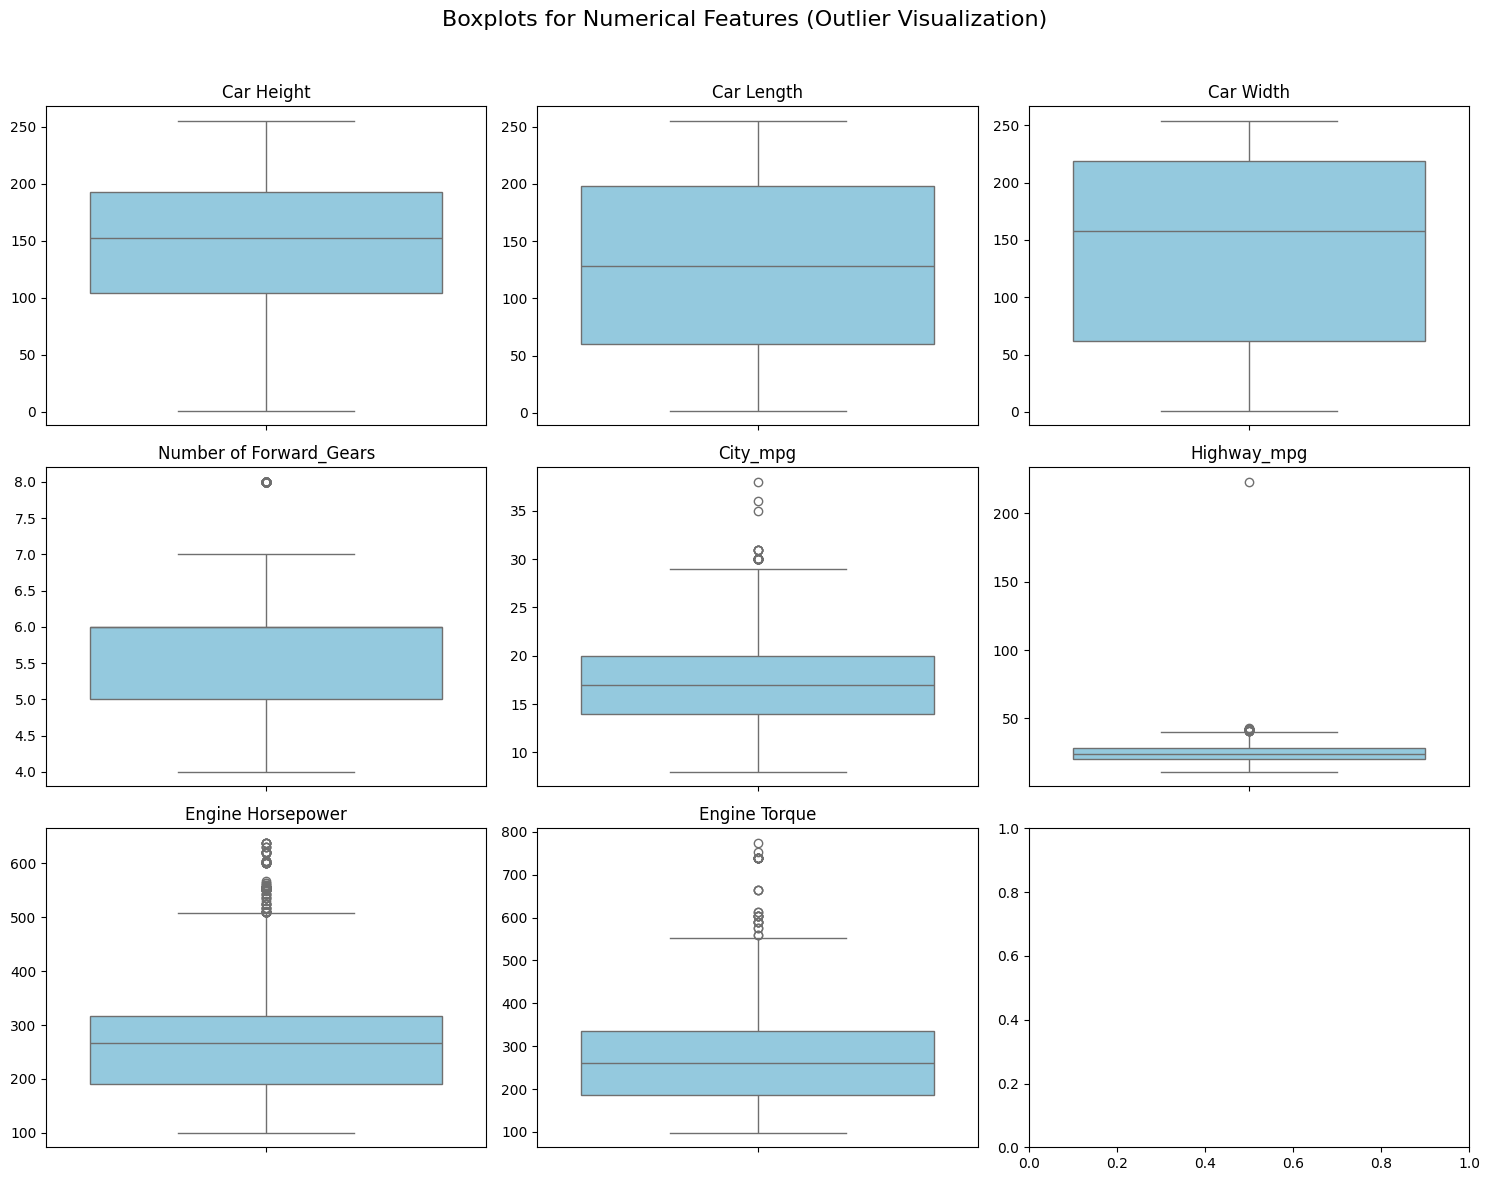

In [19]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create a grid of boxplots for each numerical column
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("Boxplots for Numerical Features (Outlier Visualization)", fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)
    axes[i].set_ylabel("")  # Remove y-label for cleaner look

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [21]:
features_with_outliers = [
    "Number of Forward_Gears",
    "City_mpg",
    "Highway_mpg",
    "Engine Horsepower",
    "Engine Torque"
]

df_clean=df.copy()

# Remove outliers for each selected feature using the IQR method
for col in features_with_outliers:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove rows with outliers in the current column
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# Display how many rows were removed
rows_removed = df.shape[0] - df_clean.shape[0]
print(f"Total rows removed: {rows_removed}")
print(f"Dataset size before: {df.shape[0]}, after: {df_clean.shape[0]}")


Total rows removed: 264
Dataset size before: 5076, after: 4812


**Data visualization**

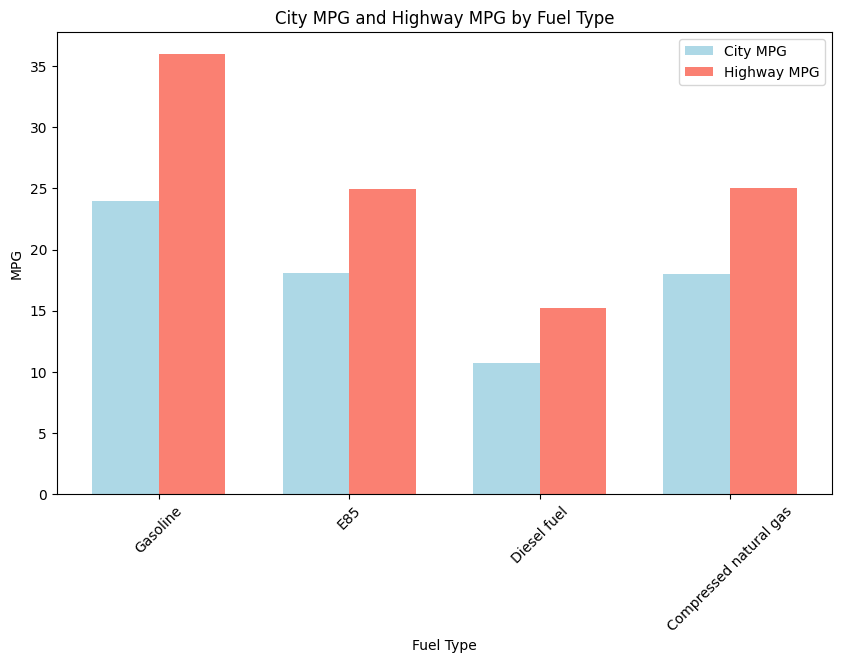

In [22]:
fuel_types = df_clean["Fuel_Type"].unique()
city_mpg_means = df_clean.groupby("Fuel_Type")["City_mpg"].mean()
highway_mpg_means = df_clean.groupby("Fuel_Type")["Highway_mpg"].mean()

# Set bar width
bar_width = 0.35
index = np.arange(len(fuel_types))  # X-axis positions for fuel types

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(index, city_mpg_means, bar_width, label="City MPG", color='lightblue')
bars2 = ax.bar(index + bar_width, highway_mpg_means, bar_width, label="Highway MPG", color='salmon')

# Labels and titles
ax.set_xlabel("Fuel Type")
ax.set_ylabel("MPG")
ax.set_title("City MPG and Highway MPG by Fuel Type")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(fuel_types, rotation=45)
ax.legend()

# Show the plot
plt.show()


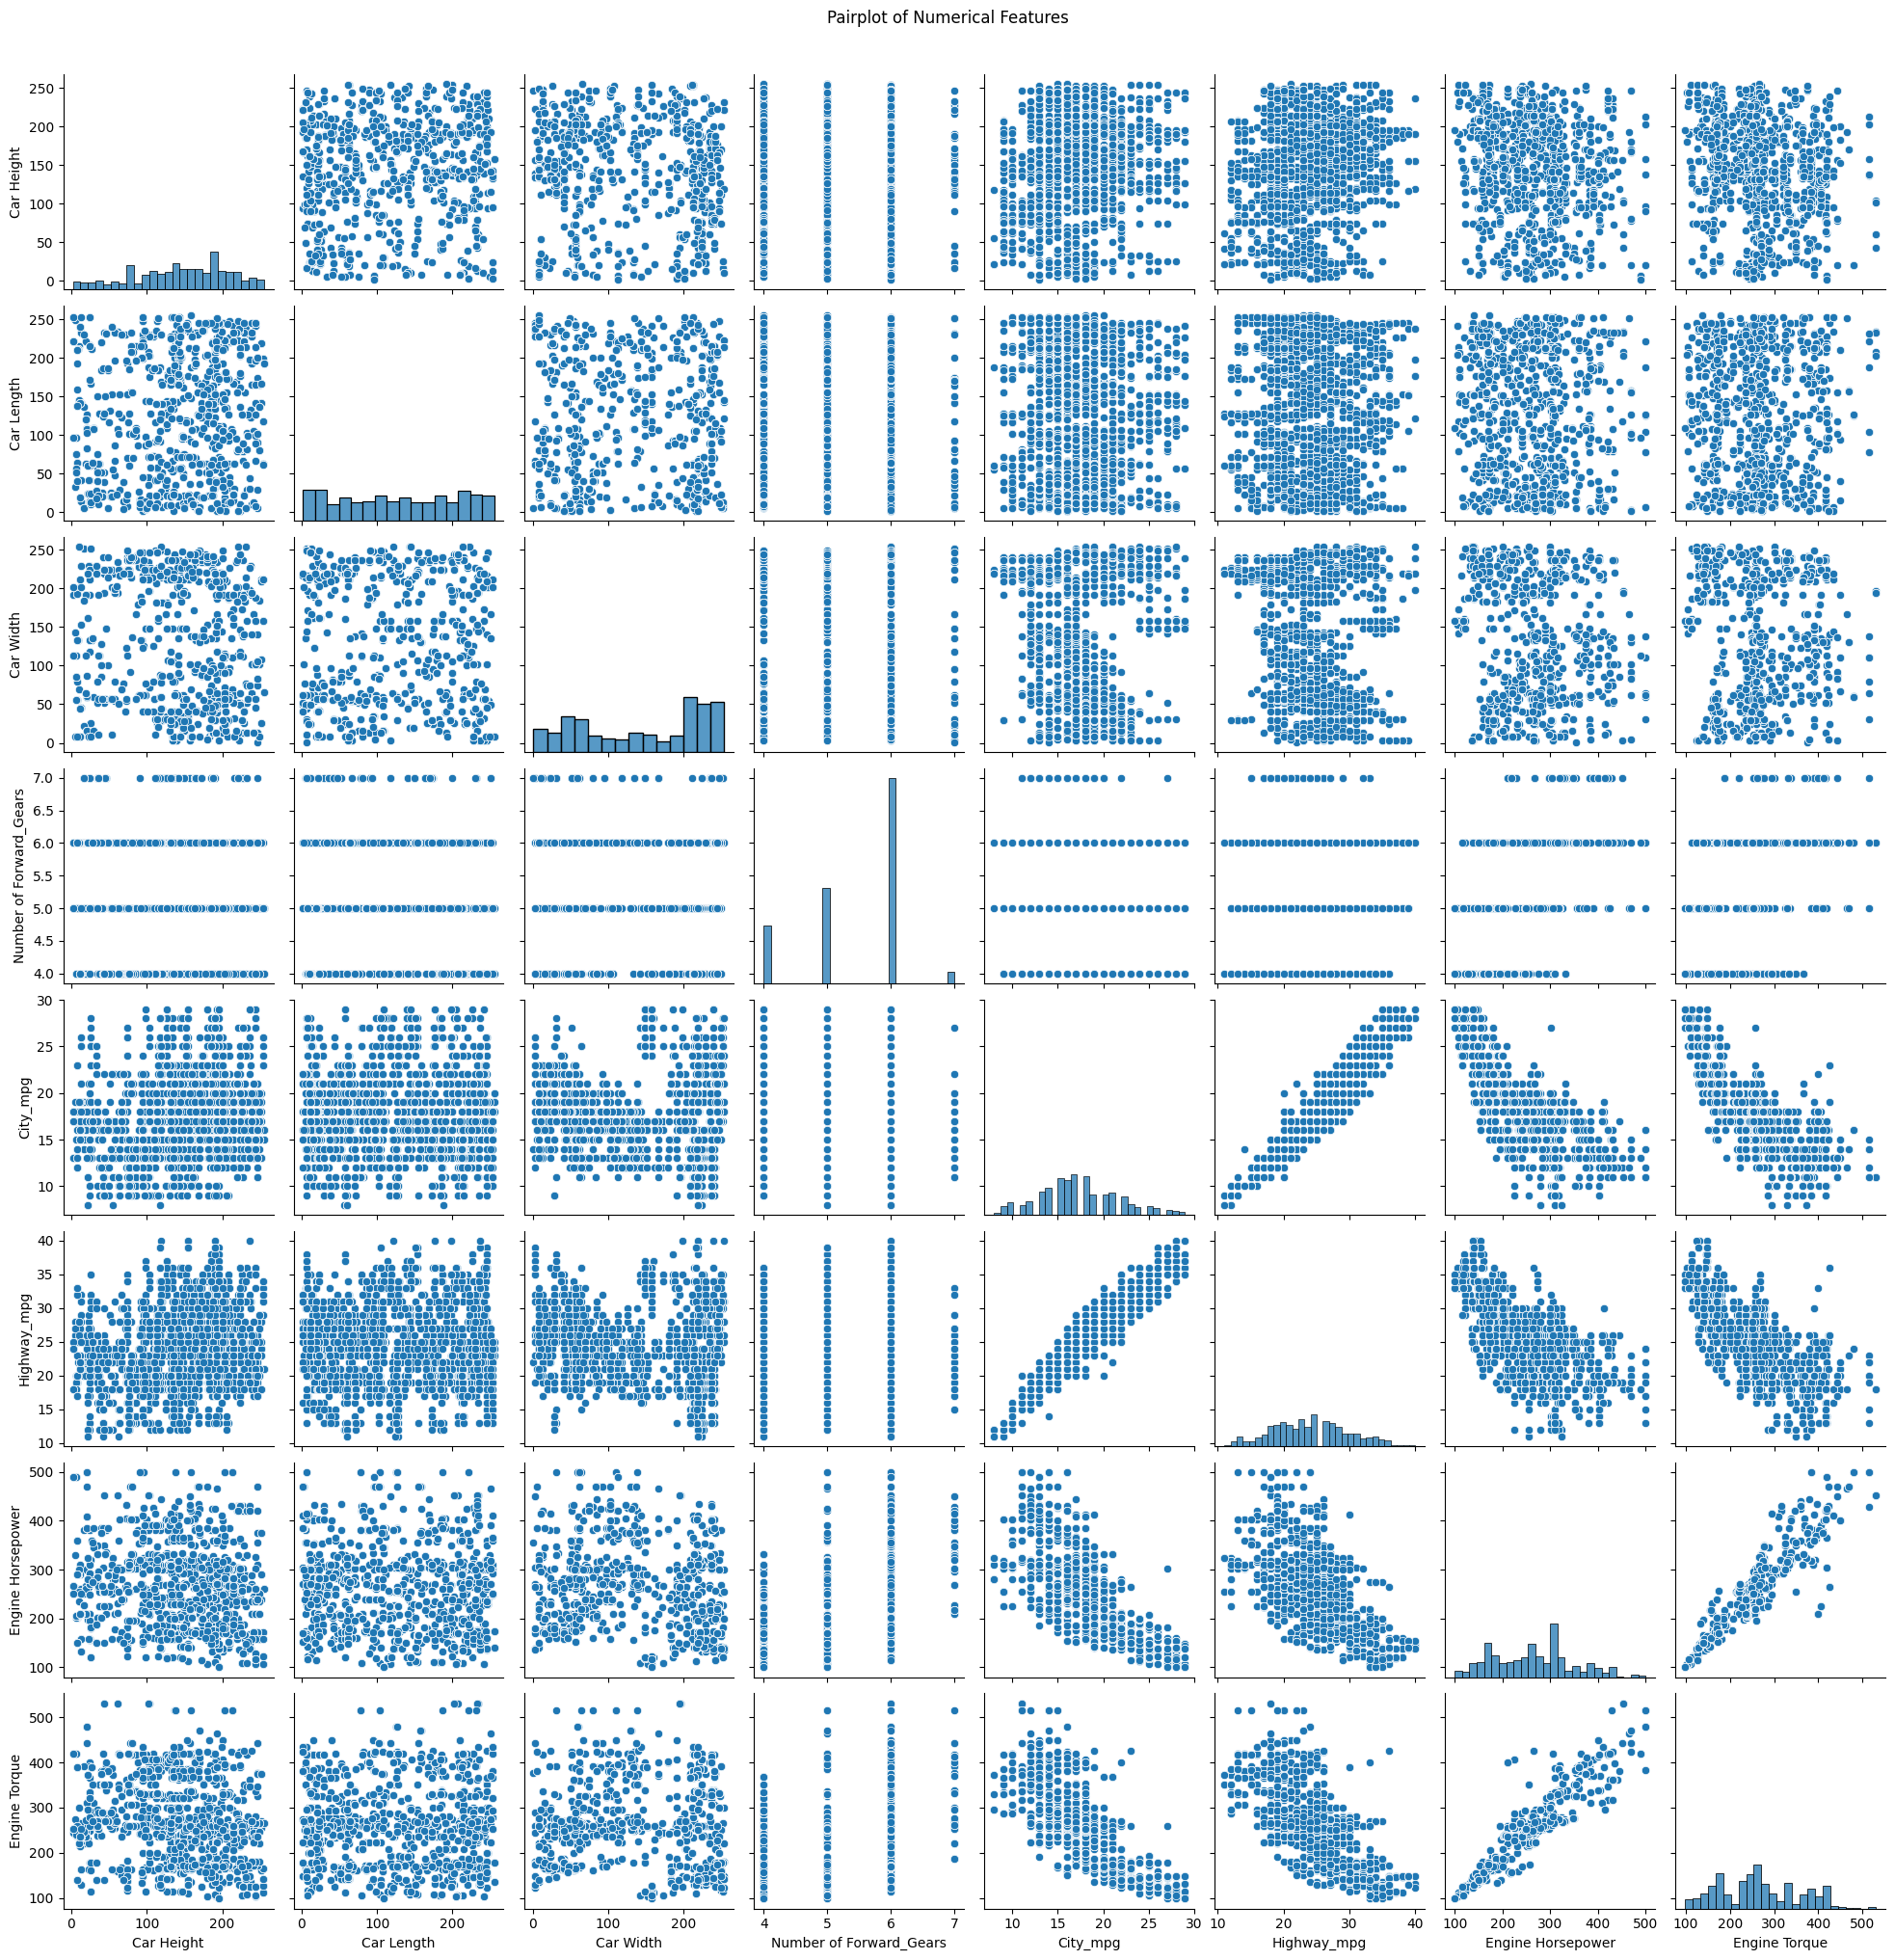

In [23]:
sns.pairplot(df_clean[numerical_cols])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


**encoding**

In [24]:
encoding_cols=df_clean[['Driveline','Transmission','Fuel_Type','Classification']]

encoder = OneHotEncoder(sparse_output=False,drop='first')  # drop='first' avoids multicollinearity

encoded_array = encoder.fit_transform(encoding_cols)

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(encoding_cols.columns))

df_final = df_clean.drop(columns=encoding_cols.columns).reset_index(drop=True)
df_final = pd.concat([df_final, encoded_df], axis=1)

print(df_final.head())


   Car Height  Car Length  Car Width  \
0         140         143        202   
1         140         143        202   
2         140         143        202   
3         140         143        202   
4         140         143        202   

                                    Engine_Type  Number of Forward_Gears  \
0          Audi 3.2L 6 cylinder 250hp 236ft-lbs                        6   
1  Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo                        6   
2  Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo                        6   
3  Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo                        6   
4  Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo                        6   

   City_mpg  Highway_mpg                          ID  Engine Horsepower  \
0        18           25            2009 Audi A3 3.2                250   
1        22           28       2009 Audi A3 2.0 T AT                200   
2        21           30          2009 Audi A3 2.0 T                200   
3 

In [25]:
# Create a HashingEncoder
encoder = ce.HashingEncoder(cols=['Engine_Type'], n_components=10) # Adjust n_components as needed

# Fit and transform the data
df_final = encoder.fit_transform(df_final)


In [26]:
columns_to_move = ['Highway_mpg', 'ID']
new_positions = [34, 33]

# Get the columns list
columns = df_final.columns.tolist()

# Remove and insert each column
for column, new_position in zip(columns_to_move, new_positions):
    if column in columns:  # Check if the column exists
        columns.remove(column)
        columns.insert(new_position, column)

# Reorder the DataFrame
df_final = df_final[columns]

print(df_final)

      col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  col_9  \
0         0      0      0      0      0      0      0      0      1      0   
1         1      0      0      0      0      0      0      0      0      0   
2         1      0      0      0      0      0      0      0      0      0   
3         1      0      0      0      0      0      0      0      0      0   
4         1      0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
4807      0      0      0      0      0      0      1      0      0      0   
4808      0      0      0      0      0      0      1      0      0      0   
4809      0      0      0      0      0      0      1      0      0      0   
4810      0      1      0      0      0      0      0      0      0      0   
4811      0      1      0      0      0      0      0      0      0      0   

      ...  Transmission_6 Speed Automatic Select Shift  \
0    

In [27]:
X=df_final.iloc[:,:33]

In [28]:
y=df_final.iloc[:,-1]

**feature selection**

In [34]:
model = LinearRegression()
selector = RFE(model, n_features_to_select=7)
X_new = selector.fit_transform(X, y)
X_new

array([[18.,  0.,  0., ...,  0.,  0.,  1.],
       [22.,  0.,  0., ...,  0.,  0.,  1.],
       [21.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [18.,  0.,  0., ...,  0.,  0.,  1.],
       [17.,  0.,  0., ...,  0.,  0.,  1.],
       [17.,  0.,  0., ...,  0.,  0.,  1.]])

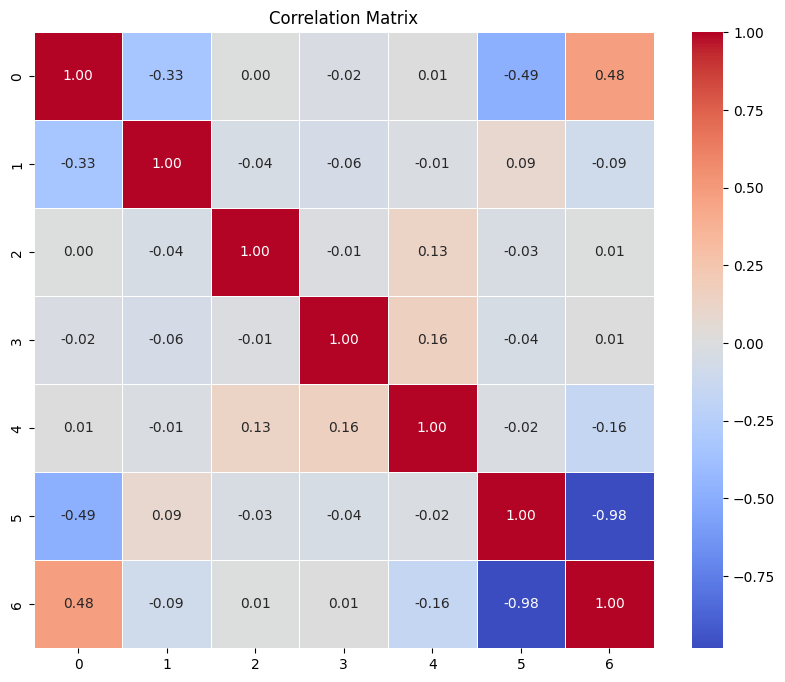

In [36]:
corr_matrix = pd.DataFrame(X_new).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


**RFE**

In [37]:
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))

# Create a DataFrame for the selected features
X_new_df = pd.DataFrame(X_new, columns=selected_features)

# Add a constant term for VIF calculation
X_new_const = add_constant(X_new_df)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X_new_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_new_const.values, i) for i in range(X_new_const.shape[1])]

print(vif_data)

Selected Features: ['City_mpg', 'Driveline_Four-wheel drive', 'Transmission_7 Speed Automatic', 'Transmission_7 Speed Automatic Select Shift', 'Fuel_Type_Diesel fuel', 'Fuel_Type_E85', 'Fuel_Type_Gasoline']
                                      Variable          VIF
0                                        const  2451.494625
1                                     City_mpg     1.487130
2                   Driveline_Four-wheel drive     1.143270
3               Transmission_7 Speed Automatic     1.021081
4  Transmission_7 Speed Automatic Select Shift     1.037348
5                        Fuel_Type_Diesel fuel     7.531768
6                                Fuel_Type_E85   206.337651
7                           Fuel_Type_Gasoline   210.755456


**VIF**

In [38]:
high_vif_features = ['Fuel_Type_E85', 'Fuel_Type_Gasoline']

# Remove these features from the DataFrame
X_new = X_new_df.drop(columns=high_vif_features)

# Print the updated list of features
print("Updated features after removing high VIF variables:", list(X_new.columns))


Updated features after removing high VIF variables: ['City_mpg', 'Driveline_Four-wheel drive', 'Transmission_7 Speed Automatic', 'Transmission_7 Speed Automatic Select Shift', 'Fuel_Type_Diesel fuel']


In [39]:
# Recompute VIF for the updated features

def compute_vif(df):
    df_const = add_constant(df)
    vif_df = pd.DataFrame()
    vif_df["Variable"] = df_const.columns
    vif_df["VIF"] = [variance_inflation_factor(df_const.values, i) for i in range(df_const.shape[1])]
    return vif_df

vif_updated = compute_vif(X_new)
print(vif_updated)

                                      Variable        VIF
0                                        const  20.780007
1                                     City_mpg   1.128416
2                   Driveline_Four-wheel drive   1.133927
3               Transmission_7 Speed Automatic   1.019623
4  Transmission_7 Speed Automatic Select Shift   1.033161
5                        Fuel_Type_Diesel fuel   1.043450


**scaling & splitting**

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

**model training**

In [46]:
model.fit(X_train, y_train)

LinearRegression()

**prediction**

In [47]:
y_pred=model.predict(X_test)
y_pred

array([30.04414734, 19.06484557, 27.6043025 , ..., 26.38438008,
       31.26406976, 17.84492315])

**evaluation metrics**

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2score=r2_score(y_test,y_pred)
print('r2score : ',r2score)
mae=mean_absolute_error(y_test,y_pred)
print('mean absolute error : ',mae)
mse=mean_squared_error(y_test,y_pred)
print('mean squared error : ',mse)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('root mean squared error : ',rmse)

r2score :  0.9180213211730798
mean absolute error :  1.272100698123158
mean squared error :  2.671890440362857
root mean squared error :  1.634591826837164


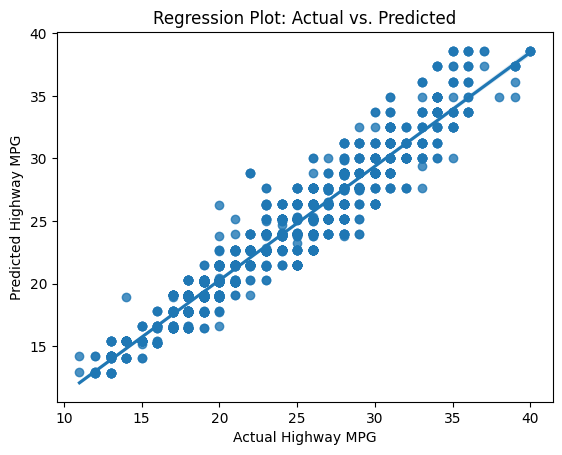

In [49]:
sns.regplot(x=y_test,y=y_pred)
plt.xlabel("Actual Highway MPG")
plt.ylabel("Predicted Highway MPG")
plt.title("Regression Plot: Actual vs. Predicted")
plt.show()

In [50]:
!git clone https://github.com/merine-j/machinelearning_projects.git

Cloning into 'machinelearning_projects'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 589.79 KiB | 4.76 MiB/s, done.
Resolving deltas: 100% (1/1), done.
